In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def smooth(Y, N):
    """
    Smooths the data by averaging over N points.
    """
    smoothened = []
    Y = list(Y)
    for i in range(len(Y)):
        if i < N:
            smoothened.append(Y[i])
        else:
            smoothened.append(sum(Y[i-N:i])/N)
    return smoothened

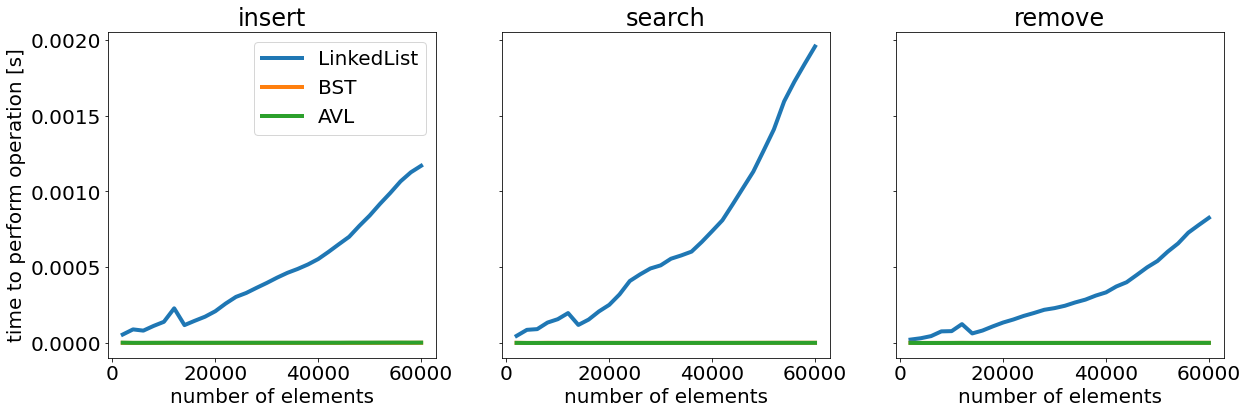

In [87]:
df = pd.read_csv("../output/output.csv")
plt.rc('font', size=20)
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(6)

for i, op in enumerate(["insert", "search", "remove"]):
    for j, s in enumerate(["LinkedList", "BST", "AVL"]):
        X = df[(df.structure == s) & (df.operation == op)].n
        Y = smooth(df[(df.structure == s) & (df.operation == op)].time, 6)
        axs[i].plot(X, Y, label=f'{s}', lw=4)
    axs[i].set_title(op)
    axs[i].set_xlabel("number of elements")
axs[0].set_ylabel("time to perform operation [s]")
axs[0].legend(loc='best')
fig.savefig("Figures/experiment.png", dpi=300)





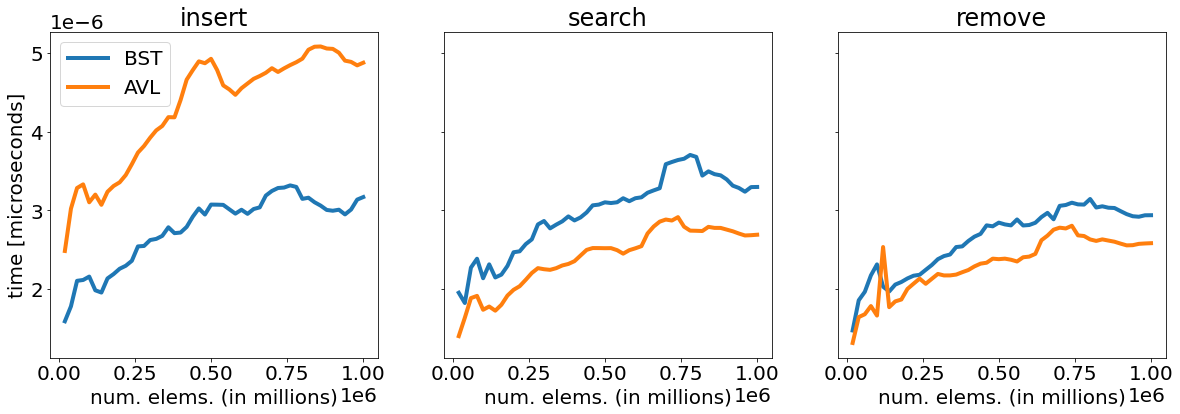

In [88]:
df = pd.read_csv("../output/output2.csv")
plt.rc('font', size=20)
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(6)

for i, op in enumerate(["insert", "search", "remove"]):
    for j, s in enumerate(["BST", "AVL"]):
        X = df[(df.structure == s) & (df.operation == op)].n
        Y = smooth(df[(df.structure == s) & (df.operation == op)].time, 6)
        axs[i].plot(X, Y, label=f'{s}', lw=4)
    axs[i].set_title(op)
    axs[i].set_xlabel("num. elems. (in millions)")   
axs[0].set_ylabel("time [microseconds]")
axs[0].legend(loc='best')
fig.savefig("Figures/experiment1.png", dpi=300)

